<a href="https://colab.research.google.com/github/seo-minsu/Python_Programming_Study/blob/main/pandas_exercises/09_Time_Series/Getting_Financial_Data/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Financial Data - Pandas Datareader

### Introduction:

This time you will get data from a website.


### Step 1. Import the necessary libraries

In [64]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

### Step 2. Create your time range (start and end variables). The start date should be 01/01/2015 and the end should today (whatever your today is).

--> 2015년 1월 1일부터 현재 날짜까지의 날짜 범위 생성

In [65]:
##날짜 범위 생성 함수: pandas.date_range

start_date = '2015-01-01'
end_date = datetime.today()

date_range = pd.date_range(start=start_date, end=end_date)

date_range

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2024-11-03', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
               '2024-11-11', '2024-11-12'],
              dtype='datetime64[ns]', length=3604, freq='D')

### Step 3. Get an API key for one of the APIs that are supported by Pandas Datareader, preferably for AlphaVantage.

--> Pandas Datareader에서 지원하는 API 중 하나에 대한 API 키 가져와라, AlphaVantage API 키 선호

If you do not have an API key for any of the supported APIs, it is easiest to get one for [AlphaVantage](https://www.alphavantage.co/support/#api-key). (Note that the API key is shown directly after the signup. You do *not* receive it via e-mail.)

(For a full list of the APIs that are supported by Pandas Datareader, [see here](https://pydata.github.io/pandas-datareader/readers/index.html). As the APIs are provided by third parties, this list may change.)

--> Pandas datareader에서 사용할 수 있는 API가 여러가지가 있지만 그 중 알파빈티지 API가 가장 간단함. 회원가입 하고 바로 키 복사해서 쓰면 됨

In [70]:
import pandas_datareader.data as web
api_key = 'DV8J848ACN9CMSGT'

## 이건 GPT가 제안한 해당 키 활용 예시인데 잘 안되었음
##data = web.Datareader('AAPL', 'av-daily', start='2020-01-01', end='2024-11-12', api_key=api_key)
##data.head()

### Step 4. Use Pandas Datarader to read the daily time series for the Apple stock (ticker symbol AAPL) between 01/01/2015 and today, assign it to df_apple and print it.

In [71]:
start_date = '2015-01-01'
end_date = datetime.today()
df_AAPL = web.DataReader('AAPL','av-daily', start=start_date, end=end_date, api_key=api_key)

df_AAPL

RemoteDataError:  Their was an issue from the data vendor side, here is their response: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}

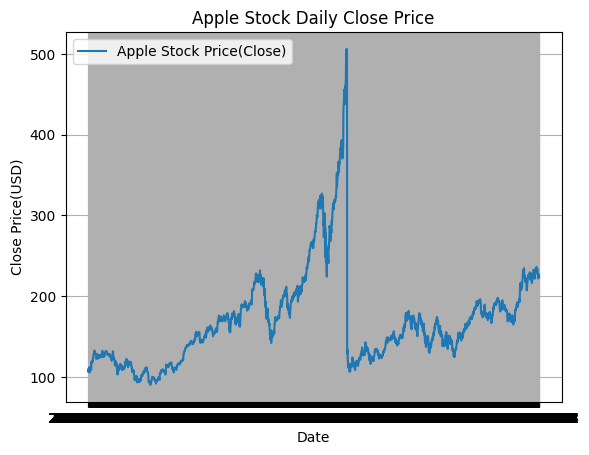

In [60]:
## 꺾은선 그래프 그리기
plt.plot(df_AAPL.index, df_AAPL['close'], label = 'Apple Stock Price(Close)')
plt.xlabel('Date')
plt.ylabel('Close Price(USD)')
plt.title('Apple Stock Daily Close Price')
plt.legend()
plt.grid(True)

plt.show()

### Step 5. Add a new column "stock" to the dataframe and add the ticker symbol

--> 데이터프레임에 새로운 열 stock을 추가하고 이 열에 티커 심볼을 추가하라

In [61]:
df_AAPL['stock']='AAPL'

df_AAPL.head(5)

,open,high,low,close,volume,stock
2015-01-02,111.39,111.44,107.350,109.33,53204626,AAPL
2015-01-05,108.29,108.65,105.410,106.25,64285491,AAPL
2015-01-06,106.54,107.43,104.630,106.26,65797116,AAPL
2015-01-07,107.20,108.20,106.695,107.75,40105934,AAPL
2015-01-08,109.23,112.15,108.700,111.89,59364547,AAPL


### Step 6. Repeat the two previous steps for a few other stocks, always creating a new dataframe: Tesla, IBM and Microsoft. (Ticker symbols TSLA, IBM and MSFT.)

--> Tesla, IBM, MS 주식 데이터도 똑같이 반복. 항상 새로운 데이터프레임을 생성하고 각 주식의 티커 심볼 추가

In [63]:
api_key = 'DV8J848ACN9CMSGT'
start_date='2015-01-01'
end_date=datetime.today()

##Tesla
df_TSLA = web.DataReader('TSLA', 'av-daily', start=start_date, end=end_date, api_key=api_key)
df_TSLA['stock']='TSLA'

##IBM
df_IBM = web.DataReader('IBM', 'av-daily', start=start_date, end=end_date, api_key=api_key)
df_IBM['stock']='IBM'

##MS
df_MSFT = web.DataReader('MSFT', 'av-daily', start=start_date, end=end_date, api_key=api_key)
df_MSFT['stock']='MSFT'

df_TSLA.head()
df_IBM.head()
df_MSFT.head()

RemoteDataError:  Their was an issue from the data vendor side, here is their response: {'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}

### Step 7. Combine the four separate dataFrames into one combined dataFrame df that holds the information for all four stocks

In [45]:
##concat 함수 사용: 여러 데이터프레임을 행 방향으로 이어붙임. 리스트 형태로 데이터프레임을 넣으면 순서대로 연결

df = pd.concat([df_AAPL, df_TSLA, df_IBM, df_MSFT])

df


,open,high,low,close,volume,stock
2015-01-02,111.390,111.44,107.350,109.33,53204626,AAPL
2015-01-05,108.290,108.65,105.410,106.25,64285491,AAPL
2015-01-06,106.540,107.43,104.630,106.26,65797116,AAPL
2015-01-07,107.200,108.20,106.695,107.75,40105934,AAPL
2015-01-08,109.230,112.15,108.700,111.89,59364547,AAPL
...,...,...,...,...,...,...
2024-11-05,408.370,414.90,408.080,411.46,17626011,MSFT
2024-11-06,412.420,420.45,410.520,420.18,26681842,MSFT
2024-11-07,421.280,426.85,419.880,425.43,19901782,MSFT
2024-11-08,425.320,426.50,421.780,422.54,16891414,MSFT


### Step 8. Shift the stock column into the index (making it a multi-level index consisting of the ticker symbol and the date).

--> stock 열을 데이터프레임의 인덱스로 이동시키고, 기존의 date 인덱스와 함께 다중 인덱스를 구성

In [46]:
df = df.set_index(['stock', df.index])
df.index.names = ['Ticker', 'Date']


df.head()

open    high      low   close    volume
Ticker Date                                                 
AAPL   2015-01-02  111.39  111.44  107.350  109.33  53204626
       2015-01-05  108.29  108.65  105.410  106.25  64285491
       2015-01-06  106.54  107.43  104.630  106.26  65797116
       2015-01-07  107.20  108.20  106.695  107.75  40105934
       2015-01-08  109.23  112.15  108.700  111.89  59364547

### Step 7. Create a dataFrame called vol, with the volume values.
--> volume 값만을 포함하는 새로운 데이터프레임 volume 생성

In [47]:
volume = df[['volume']]

volume.head()

volume
Ticker Date                
AAPL   2015-01-02  53204626
       2015-01-05  64285491
       2015-01-06  65797116
       2015-01-07  40105934
       2015-01-08  59364547

### Step 8. Aggregate the data of volume to weekly.
Hint: Be careful to not sum data from the same week of 2015 and other years.

--> 거래량 데이터를 주간 기준으로 집계

In [37]:
##resample 함수 사용하여 volume 데이터프레임을 주 단위로 리샘플림하고, 거래량을 합산
##volume_weekly = volume.groupby('Ticker').resample('W', level='Date').sum()

##volume_weekly.head()




volume
Ticker Date                 
AAPL   2015-01-04   53204626
       2015-01-11  282868187
       2015-01-18  304226647
       2015-01-25  198737041
       2015-02-01  465842684

In [36]:
##volume_weekly = volume.groupby('Ticker').resample('W-MON', level='Date').sum()
##volume_weekly.head()

## 이렇게 하면 Date가 DatetimeIndex가 아니어서 타입에러 발생함.
## 따라서 Date 인덱스를 강제로 DatetimeIndex로 바꿔줘야 함.

##volume.index = volume.index.set_levels([volume.index.levels[0], pd.to_datetime(volume.index.levels[1])])
##volume_weekly = volume.groupby('Ticker').resample('W-MON', level='Date').sum()

##volume_weekly

## 이렇게 했는데도 답지와는 다름

volume
Ticker Date                 
AAPL   2015-01-05  117490117
       2015-01-12  268233486
       2015-01-19  254575857
       2015-01-26  254352020
       2015-02-02  472966805
...                      ...
TSLA   2024-10-14  434600549
       2024-10-21  260354250
       2024-10-28  597965070
       2024-11-04  327437730
       2024-11-11  763493742

[2060 rows x 1 columns]

In [55]:
# Date 열을 datetime 형식으로 변환
volume['Date'] = pd.to_datetime(volume['Date'])

# Date를 기반으로 연도와 주차 정보를 추가
volume = volume.reset_index()  # 기존 인덱스를 풀어 열로 변환
volume['year'] = volume['Date'].dt.year  # 연도 추출
volume['week'] = volume['Date'].dt.isocalendar().week  # 주차 정보 추출

# 연도와 주차별로 거래량 합산
volume_weekly = volume.groupby(['year', 'week', 'Ticker'])['volume'].sum().reset_index()

# 피벗 테이블 생성하여 주식 티커를 열로 변환
volume_pivot = volume_weekly.pivot(index=['year', 'week'], columns='Ticker', values='volume')

# 결과 확인
volume_pivot

ValueError: cannot insert level_0, already exists

In [53]:
# Date 열이 인덱스로 없을 경우를 대비해 Date 열을 DatetimeIndex로 변환 후 인덱스로 설정
##volume = volume.reset_index()  # 기존의 인덱스를 열로 변환 (필요할 경우)
##volume['Date'] = pd.to_datetime(volume['Date'])  # Date 열을 Datetime으로 변환
##volume = volume.set_index('Date')  # Date 열을 인덱스로 설정

# 주 단위로 거래량 합산
##volume_weekly = volume.groupby('Ticker').resample('W-MON').sum()

# 다중 인덱스를 연도와 주차 정보로 변환
##volume_weekly['year'] = volume_weekly.index.get_level_values('Date').year
##volume_weekly['week'] = volume_weekly.index.get_level_values('Date').isocalendar().week

# 인덱스 재정렬 (보기 좋게 연도와 주차를 인덱스로 설정)
##volume_weekly = volume_weekly.reset_index().set_index(['year', 'week', 'Ticker'])

# 최종 결과 확인
##vol_weekly

ValueError: cannot insert level_0, already exists

### Step 9. Find all the volume traded in the year of 2015

In [54]:
volume_2015 = volume_weekly.loc[2015]

volume_2015

,2015
year,2024
week,34
Ticker,TSLA
volume,381622057
